<a href="https://colab.research.google.com/github/Faith-Mueni/Python-Data-Analysis/blob/main/Carbonfootprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
carbonprint=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')

In [ ]:
carbonprint.head(5)

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [ ]:
carbonprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa. Use this image

In [55]:
countries=['Kenya','Uganda','Tanzania','Rwanda','Ethiopia']
filtered_countries=carbonprint[carbonprint['country'].isin(countries)]
#filtered_countries=carbonprint[carbonprint['country'].isin(countries)]
#Average_CO2_emission=filtered_countries.groupby(['food_category'])['co2_emmission'].mean()


In [123]:
Average_CO2_emmission=filtered_countries.groupby(['country','food_category'])['co2_emmission'].mean().reset_index()

In [124]:
(Average_CO2_emmission)

,country,food_category,co2_emmission
0,Ethiopia,Beef,111.40
1,Ethiopia,Eggs,0.33
2,Ethiopia,Fish,0.38
3,Ethiopia,Lamb & Goat,54.98
4,Ethiopia,Milk - inc. cheese,62.87
5,Ethiopia,Nuts inc. Peanut Butter,2.14
6,Ethiopia,Pork,0.07
7,Ethiopia,Poultry,0.71
8,Ethiopia,Rice,2.88
9,Ethiopia,Soybeans,0.20


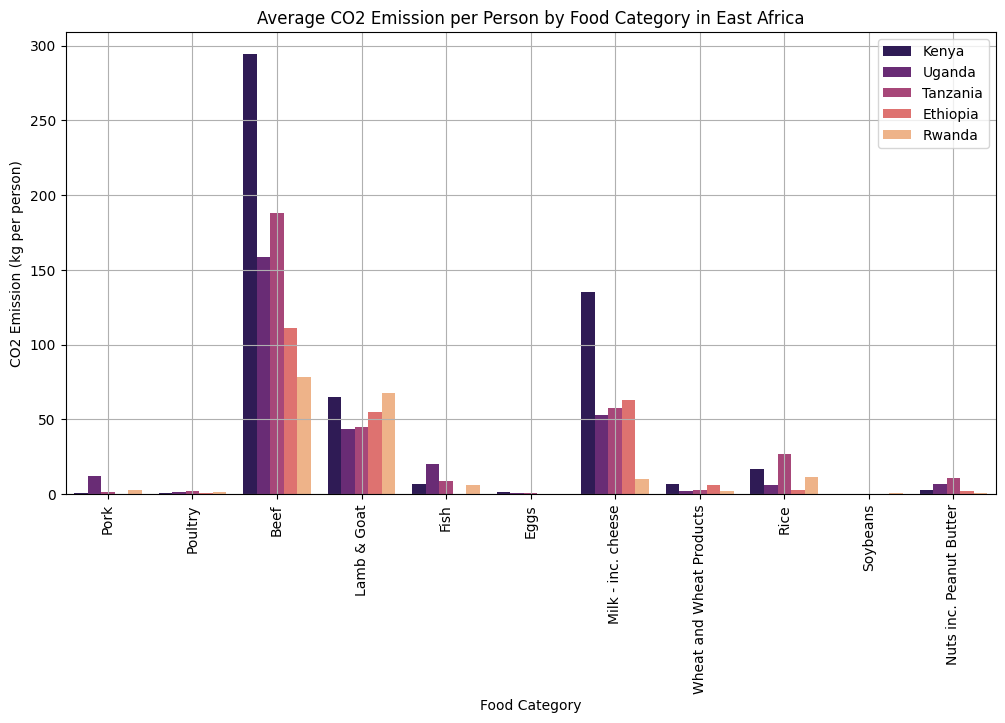

In [257]:
plt.figure(figsize=(12,6))
sns.barplot(x='food_category', y='co2_emmission',hue='country',data=filtered_countries, palette='magma')
plt.title('Average CO2 Emission per Person by Food Category in East Africa')
plt.xlabel('Food Category')
plt.ylabel('CO2 Emission (kg per person)')
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.legend()

plt.show()

The food consumption of animal and non-animal products and the impact on carbon footprint. Use this image

In [219]:
non_animal_products=['Wheat and Wheat Products','Rice','Soybeans','Nuts inc. Peanut Butter']
animal_products=['Eggs','Poultry','Pork','Beef','Fish','Lamb & Goat','Milk - inc. cheese']

carbonprint['product_category']=np.where(carbonprint['food_category'].isin(non_animal_products),'non_animal_products', 'animal_products')


In [223]:
carbonprint.head(10)

,country,food_category,consumption,co2_emmission,merged_products,product_category
0,Argentina,Pork,10.51,37.20,animal_product,animal_products
1,Argentina,Poultry,38.66,41.53,animal_product,animal_products
2,Argentina,Beef,55.48,1712.00,animal_product,animal_products
3,Argentina,Lamb & Goat,1.56,54.63,animal_product,animal_products
4,Argentina,Fish,4.36,6.96,animal_product,animal_products
5,Argentina,Eggs,11.39,10.46,animal_product,animal_products
6,Argentina,Milk - inc. cheese,195.08,277.87,animal_product,animal_products
7,Argentina,Wheat and Wheat Products,103.11,19.66,non_animal,non_animal_products
8,Argentina,Rice,8.77,11.22,non_animal,non_animal_products
9,Argentina,Soybeans,0.00,0.00,non_animal,non_animal_products


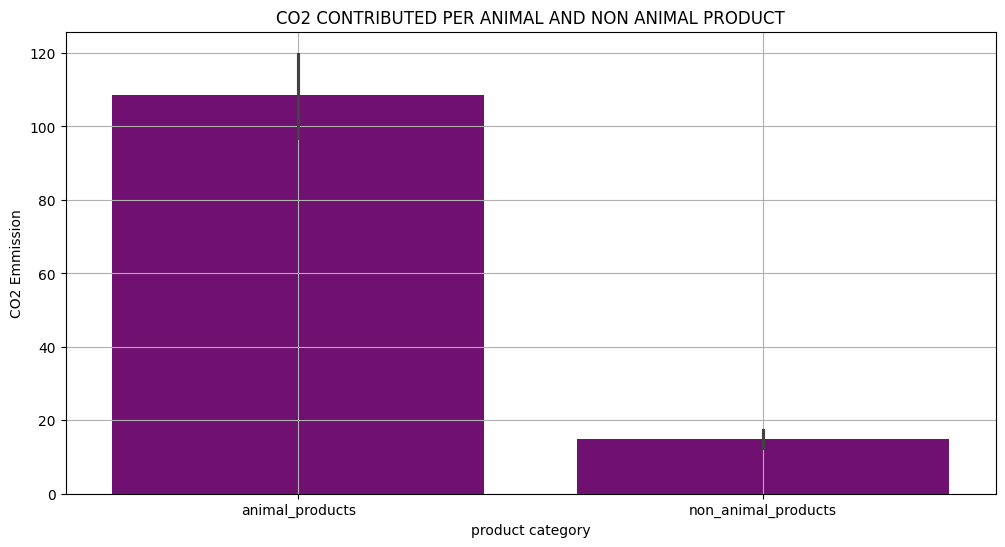

In [256]:
plt.figure(figsize=(12,6))
sns.barplot(y='co2_emmission',x='product_category', data=carbonprint,color='purple')
plt.title('CO2 CONTRIBUTED PER ANIMAL AND NON ANIMAL PRODUCT')
plt.ylabel('CO2 Emmission')
plt.xlabel('product category')
plt.grid(visible=True)

plt.show()

# New Section
Beef's contribution to CO2 emissions (kg/person/year) - Map this.


In [167]:
beef_emissions = carbonprint[carbonprint['food_category'] == 'Beef'].sort_values(by='co2_emmission',ascending=False)



In [168]:
beef_emissions

,country,food_category,consumption,co2_emmission,merged_products,product_category
2,Argentina,Beef,55.48,1712.00,animal_product,animal_product
90,Brazil,Beef,39.25,1211.17,animal_product,animal_product
57,USA,Beef,36.24,1118.29,animal_product,animal_product
13,Australia,Beef,33.86,1044.85,animal_product,animal_product
123,Bermuda,Beef,33.15,1022.94,animal_product,animal_product
...,...,...,...,...,...,...
1421,Bangladesh,Beef,1.28,39.50,animal_product,animal_product
1300,Ghana,Beef,1.09,33.64,animal_product,animal_product
1355,Mozambique,Beef,1.04,32.09,animal_product,animal_product
1333,India,Beef,0.81,24.99,animal_product,animal_product


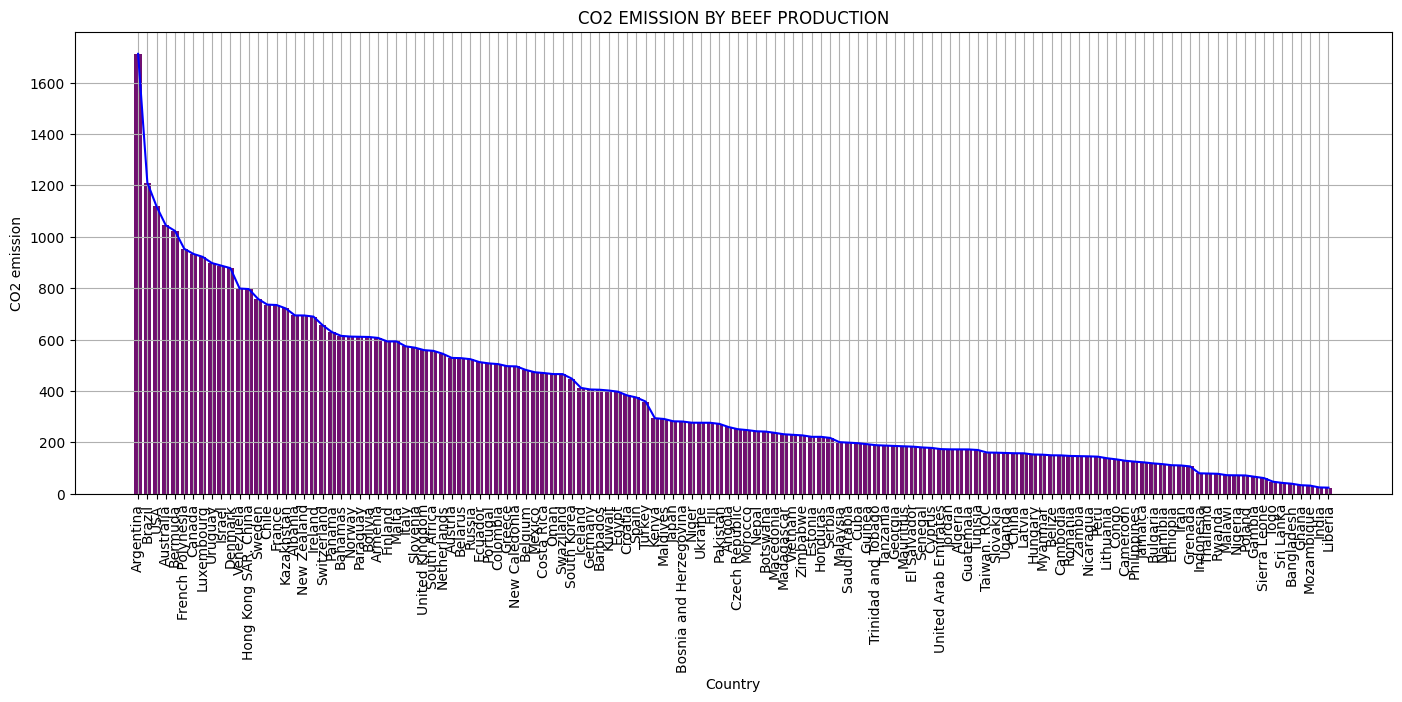

In [259]:
plt.figure(figsize=(17,6))
sns.barplot(y='co2_emmission',x='country', data=beef_emissions,color='purple')
sns.lineplot(y='co2_emmission',x='country', data=beef_emissions,color='blue')

plt.title('CO2 EMISSION BY BEEF PRODUCTION')
plt.ylabel('CO2 emission')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.grid(visible=True)


plt.show()

Highlight the marked difference between consumption and emissions in certain food product of your choice


In [235]:
food=['Beef','Rice','Fish','Eggs']
food_type=carbonprint[carbonprint['food_category'].isin(food)]


In [236]:
food_type

,country,food_category,consumption,co2_emmission,merged_products,product_category
2,Argentina,Beef,55.48,1712.00,animal_product,animal_products
4,Argentina,Fish,4.36,6.96,animal_product,animal_products
5,Argentina,Eggs,11.39,10.46,animal_product,animal_products
8,Argentina,Rice,8.77,11.22,non_animal,non_animal_products
13,Australia,Beef,33.86,1044.85,animal_product,animal_products
...,...,...,...,...,...,...
1416,Liberia,Rice,94.75,121.25,non_animal,non_animal_products
1421,Bangladesh,Beef,1.28,39.50,animal_product,animal_products
1423,Bangladesh,Fish,18.07,28.85,animal_product,animal_products
1424,Bangladesh,Eggs,2.08,1.91,animal_product,animal_products


In [247]:
sum_consumption=food_type.groupby('food_category')[['consumption','co2_emmission']].sum().reset_index()

In [248]:
sum_consumption

,food_category,consumption,co2_emmission
0,Beef,1576.04,48633.26
1,Eggs,1061.29,974.95
2,Fish,2247.32,3588.22
3,Rice,3818.77,4886.91


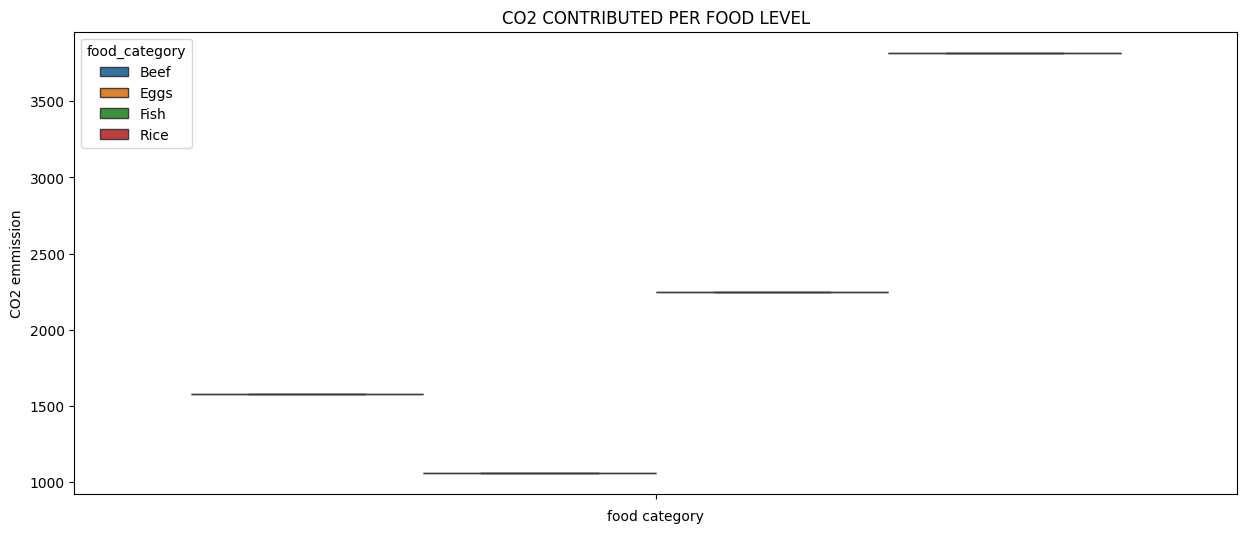

In [250]:
plt.figure(figsize=(15,6))
sns.boxplot(y='consumption', data=sum_consumption)
plt.title('CO2 CONTRIBUTED PER FOOD LEVEL')
plt.xlabel('food category')
plt.ylabel('CO2 emmission')

plt.show()

A box plot and interpretation of the CO2 contributions of food levels. Use this image as inspiration

In [ ]:
sorted=carbonprint.sort_values(by='co2_emmission',ascending=False)

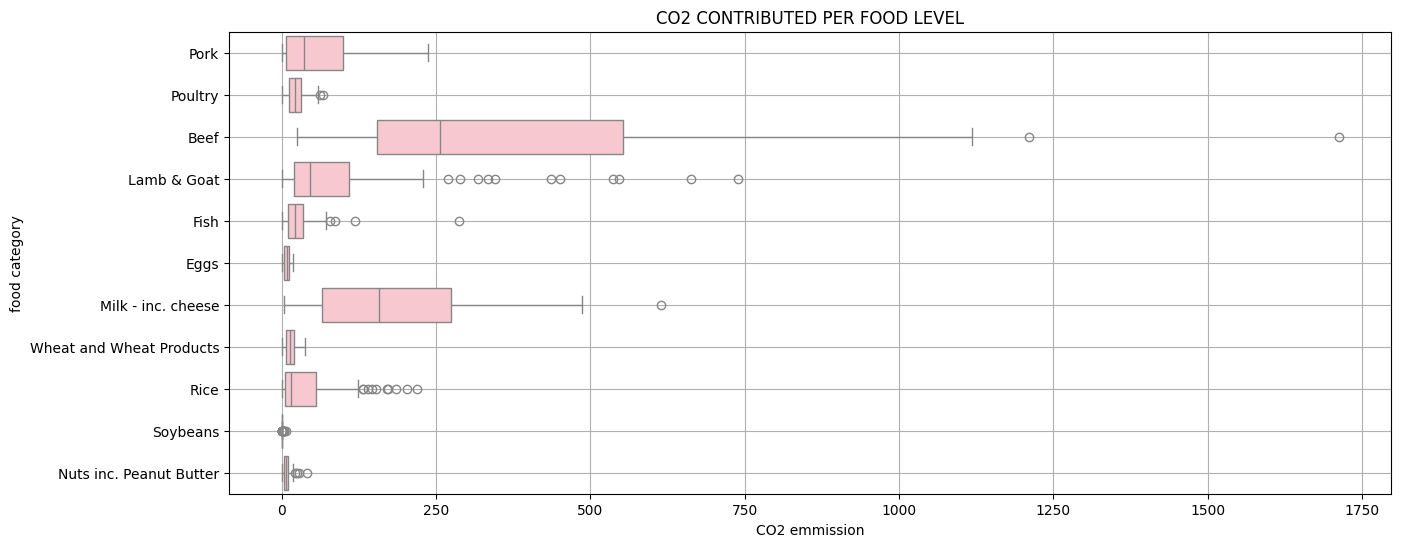

In [253]:
plt.figure(figsize=(15,6))
sns.boxplot(x='co2_emmission',y='food_category', data=carbonprint,color='pink')
plt.title('CO2 CONTRIBUTED PER FOOD LEVEL')
plt.ylabel('food category')
plt.xlabel('CO2 emmission')
plt.grid(visible=True)

plt.show()


Top 10 Countries with highest emissions. Choose the appropriate visual type. Get inspiration from this image

In [198]:
country_emissions = carbonprint.groupby('country')['co2_emmission'].sum().reset_index()
country_emissions = country_emissions.sort_values(by='co2_emmission', ascending=False)

In [199]:
top_10_countries = country_emissions.head(10)

In [200]:
top_10_countries

,country,co2_emmission
3,Argentina,2172.40
5,Australia,1938.66
0,Albania,1777.85
84,New Zealand,1750.95
52,Iceland,1731.36
120,USA,1718.86
125,Uruguay,1634.91
17,Brazil,1616.73
68,Luxembourg,1598.41
62,Kazakhstan,1575.08


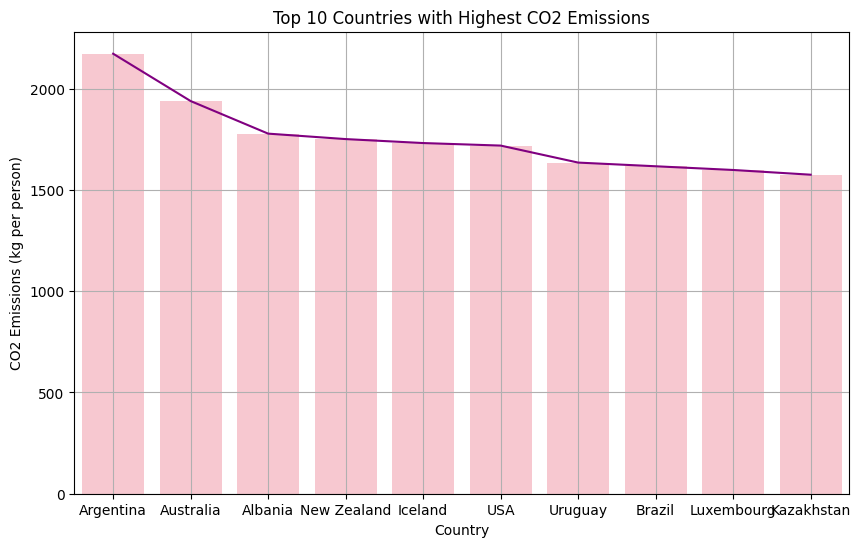

In [264]:
plt.figure(figsize=(10,6))
sns.lineplot(x='country', y='co2_emmission', data=top_10_countries,color='purple')
sns.barplot(x='country', y='co2_emmission', data=top_10_countries,color='pink')

plt.title('Top 10 Countries with Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (kg per person)')
plt.grid(visible=True)
plt.show()

Use all your data to write a 500 words minimum of insights and the story behind your exploration.


Alternatively compile a set of slides with your insights.